In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [45]:
df = pd.read_csv('../Dataset/BTC_USD-Binance-Historical-Data.csv')
df = df.sort_index(ascending=False)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
1827,3/1/2019,"3,823.20","3,813.60","3,856.30","3,813.40",22.28K,0.24%
1826,3/2/2019,"3,820.00","3,820.50","3,840.40","3,775.00",18.49K,-0.08%
1825,3/3/2019,"3,806.40","3,820.30","3,834.70","3,784.80",15.99K,-0.36%
1824,3/4/2019,"3,715.00","3,807.80","3,828.00","3,674.90",32.61K,-2.40%
1823,3/5/2019,"3,857.50","3,716.10","3,876.00","3,705.40",30.82K,3.83%


In [46]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))

In [47]:
train_data = df[:round(len(df)*70/100)]
test_data = df[round(len(df)*70/100):round(len(df)*90/100)]
val_data = df[round(len(df)*90/100):]

print(train_data)
print(test_data)
print(val_data)

           Date    Price       Open       High        Low     Vol. Change %
1827 2019-03-01   3823.2   3,813.60   3,856.30   3,813.40   22.28K    0.24%
1826 2019-03-02   3820.0   3,820.50   3,840.40   3,775.00   18.49K   -0.08%
1825 2019-03-03   3806.4   3,820.30   3,834.70   3,784.80   15.99K   -0.36%
1824 2019-03-04   3715.0   3,807.80   3,828.00   3,674.90   32.61K   -2.40%
1823 2019-03-05   3857.5   3,716.10   3,876.00   3,705.40   30.82K    3.83%
...         ...      ...        ...        ...        ...      ...      ...
552  2022-08-27  20034.2  20,214.90  20,341.00  19,849.00  162.63K   -1.06%
551  2022-08-28  19551.1  20,036.00  20,150.50  19,545.00  139.30K   -2.41%
550  2022-08-29  20295.6  19,563.70  20,395.00  19,563.70  210.50K    3.81%
549  2022-08-30  19792.0  20,284.90  20,558.40  19,560.50  256.63K   -2.48%
548  2022-08-31  20049.8  19,818.50  20,475.00  19,809.70  276.95K    1.30%

[1280 rows x 7 columns]
          Date    Price       Open       High        Low     Vo

In [48]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [49]:
train_size = int(len(X) * 0.8)
X_train, X_test, X_val = X[:round(len(X) * 0.7)], X[round(len(X) * 0.7):round(len(X) * 0.9)],X[round(len(X) * 0.9):] 
y_train, y_test, y_val = y[:round(len(X) * 0.7)], y[round(len(X) * 0.7):round(len(X) * 0.9)],y[round(len(X) * 0.9):]

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)

In [52]:
n_days_for_prediction= 30
cols = list(df)[1:6]
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction).tolist()


In [53]:
df1 = pd.DataFrame(predict_period_dates, columns=['Date'])

In [54]:
X_pred = df1['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)

In [55]:
prediction1 = model.predict(X_pred)

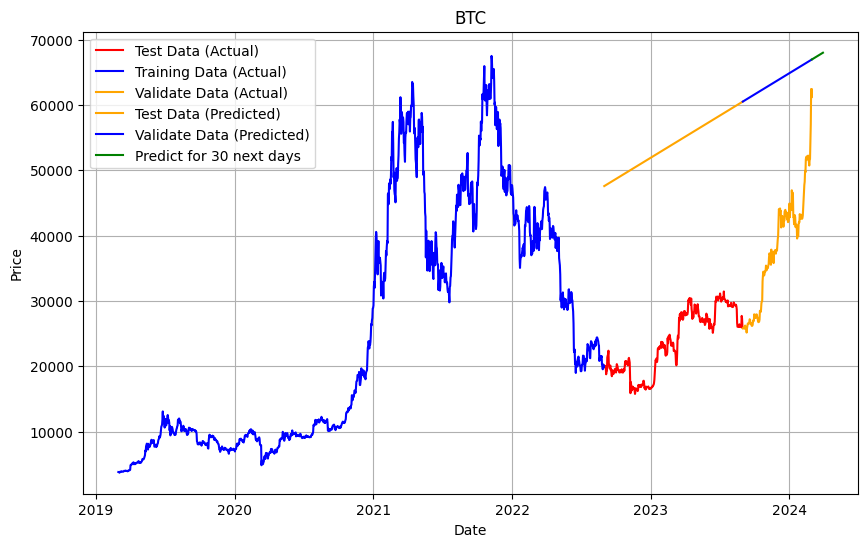

In [56]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(val_data['Date'], val_data['Price'], linestyle='-', color='orange', label='Validate Data (Actual)')

plt.plot(test_data['Date'], y_test_pred, linestyle='-', color='orange', label='Test Data (Predicted)')
plt.plot(val_data['Date'], y_val_pred, color='blue', label='Validate Data (Predicted)')
plt.plot(predict_period_dates, prediction1, linestyle='-', color='g', label='Predict for 30 next days')

plt.title('BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()